## User Overview Analysis

* identify the top 10 handsets used by the customers.
* identify the top 3 handset manufacturers
* identify the top 5 handsets per top 3 handset manufacturer
* Make a short interpretation and recommendation to marketing teams

In [77]:
# import required packages and modules
import sys
sys.path.insert(0,'../scripts/')

import pandas as pd
import numpy as np
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [78]:
# load the cleaned .csv dataset
df = pd.read_csv("../data/cleaned_telecom_data_source.csv",index_col=0)

In [79]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [80]:
from user_overview import UserOverview

# create an object of UserOverview class
user_ov = UserOverview(df)

In [81]:
# display the top 10 handsets
top_10_handsets = user_ov.get_top_handsets(10)
top_10_handsets

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

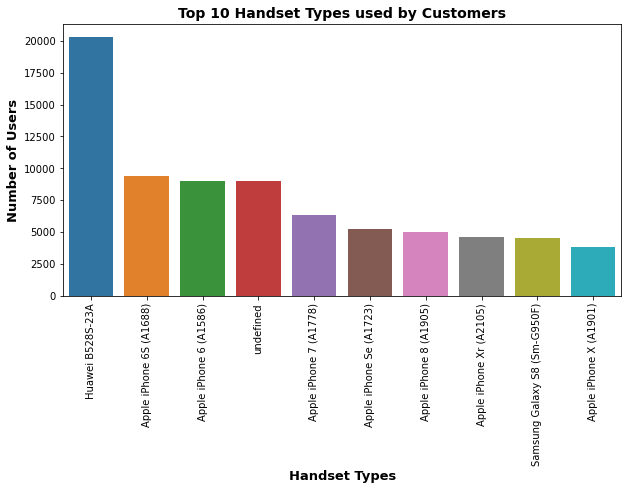

In [82]:
# display the top_handsets result in bar graph
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values)
plt.title('Top 10 Handset Types used by Customers', size=14, fontweight="bold")
plt.xlabel('Handset Types', size=13, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [83]:
# display the top 3 manufacturers
top_3_manufacturers = user_ov.get_top_manufacturers(3)
top_3_manufacturers 


Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

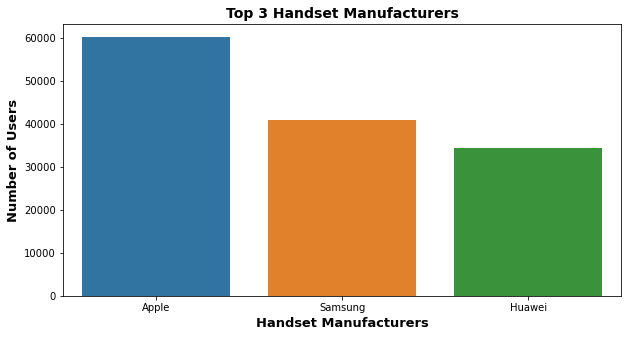

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Handset Manufacturers', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [85]:
# display the top 5 handsets per top 3 manufacturers
top5_handsets_by_top3_manufacturers = user_ov.get_top_handset_by_top_manufacturer(5,3)

****Apple ****
Handset Type
Apple iPhone 6S (A1688)    6760
Apple iPhone 6 (A1586)     6261
Apple iPhone 7 (A1778)     4700
Apple iPhone Se (A1723)    3756
Apple iPhone 8 (A1905)     3544
Name: MSISDN/Number, dtype: int64
****Samsung ****
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3246
Samsung Galaxy J5 (Sm-J530)     2749
Samsung Galaxy A5 Sm-A520F      2709
Samsung Galaxy J3 (Sm-J330)     2590
Samsung Galaxy S7 (Sm-G930X)    2292
Name: MSISDN/Number, dtype: int64
****Huawei ****
Handset Type
Huawei B528S-23A                  10617
Huawei P20 Lite Huawei Nova 3E     1532
Huawei E5180                       1183
Huawei P20                         1110
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64


In [86]:
# top5_handsets_by_top3_manufacturers

apple_manufacturer = df.loc[df['Handset Manufacturer'] == 'Apple', ['Handset Type']].value_counts().nlargest(5)
samsung_manufacturer = df.loc[df['Handset Manufacturer'] == 'Samsung', ['Handset Type']].value_counts().nlargest(5)
huawei_manufacturer = df.loc[df['Handset Manufacturer'] == 'Huawei', ['Handset Type']].value_counts().nlargest(5)

apple_manufacturer.index
apple_manufacturer.values

array([9419, 9023, 6326, 5187, 4993])

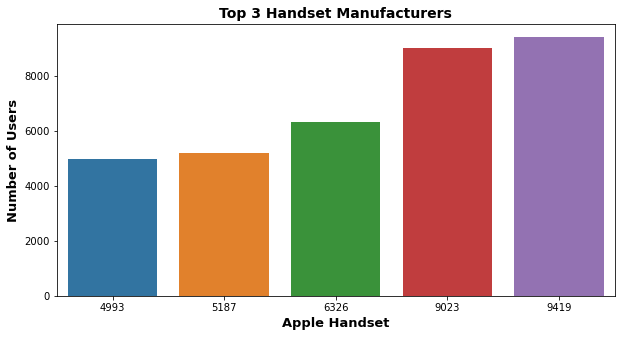

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(x=apple_manufacturer, y=apple_manufacturer)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Apple Handset', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

### Insights and Interpretation

* The phones widely used in the network are manufactured by the Apple, Samsung and Huawei, contributing for 135,399 customers. 
* The most used phone is Hwawei B528S-23A covering 20324 of the phones followed by Apple iPhpone 6S (A1688) and Apple iPhone 6 (A1586).
* Samsung Galaxy S8 (Sm-G950F) is the most popular handset from the samsung handsets and The Huawei B528S-23A is one favoured by customers.

### User's Behavior

##### on the following applications

* Social Media
* Google
* Email
* YouTube
* Netflix
* Gaming
* Other

##### Aggregate users information based on the following columns:
1. Number of xDR sessions
2. Session duration
3. the total download (DL) and upload (UL) data
4. the total data volume (in Bytes) during this session for each application


In [91]:
agg_df = df.copy()

agg_df.insert(45,"Total Data (Bytes)","")
agg_df["Total Data (Bytes)"] = pd.to_numeric(agg_df["Total Data (Bytes)"])
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [92]:
# total data usage of user for above listed applications
agg_df["Social Media (Bytes)"] = agg_df["Social Media DL (Bytes)"] + agg_df['Social Media UL (Bytes)']
agg_df["Google (Bytes)"]       = agg_df["Google DL (Bytes)"] + agg_df["Google UL (Bytes)"]
agg_df['Youtube (Bytes)']      = agg_df["Youtube DL (Bytes)"] + agg_df["Youtube UL (Bytes)"]
agg_df['Netflix (Bytes)']      = agg_df["Netflix DL (Bytes)"] + agg_df["Netflix UL (Bytes)"]
agg_df["Gaming (Bytes)"]       = agg_df["Gaming DL (Bytes)"] + agg_df["Gaming UL (Bytes)"]
agg_df['Email (Bytes)']        = agg_df["Email DL (Bytes)"] + agg_df["Email UL (Bytes)"]
agg_df['Other (Bytes)']        = agg_df["Other DL (Bytes)"]+ agg_df["Other UL (Bytes)"]
agg_df['Total Data (Bytes)']   = agg_df['Total UL (Bytes)'] + agg_df['Total DL (Bytes)']


In [93]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [94]:
aggregate = {"Bearer Id": 'count', 'Dur. (ms)':'sum', 'Total UL (Bytes)': 'sum', 
'Total DL (Bytes)': 'sum','Total Data (Bytes)':'sum'}
aggregated_data = agg_df.groupby('MSISDN/Number').agg(aggregate)
# aggregated_data['Total Data (Bytes)'] = aggregated_data['Total UL (Bytes)'] + aggregated_data['Total DL (Bytes)']
aggregated_data.head()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
MSISDN/Number,,,,,
3.360100e+10,1,116720.0,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,1,181230.0,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,1,134969.0,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,1,49878.0,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,2,37104.0,94280527.0,1.363130e+09,1.457411e+09
